# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [133]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import country_converter as coco
cc = coco.CountryConverter()

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [23]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print("What is the shape of df_data?\nThe df_data has",df_data.shape[0],"rows and",df_data.shape[1],"columns")

What is the shape of df_data?
The df_data has 4324 rows and 9 columns


In [7]:
print("The columns names are\n",df_data.columns)

The columns names are
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [24]:
# df_data[df_data.Price.isna()] 
# 3360 rows which has NaN as Price, therefore rempove Price as column
df_data.drop(columns=['Price','Unnamed: 0.1','Unnamed: 0'],inplace = True)

In [18]:
# df_data.duplicated().any()
# no duplicates in the data

## Descriptive Statistics

In [26]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
count,4324,4324,4324,4324,4324,4324
unique,56,137,4319,4278,2,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,Success
freq,1777,235,2,6,3534,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [53]:
df_data_org = df_data.groupby(by=["Organisation"]).count()
df_data_org = df_data_org.sort_values(by=['Location'])
df_data_org_top = df_data_org[df_data_org.Location>=46]

In [55]:
h_bar = px.bar(x=df_data_org_top.Location,
               y=df_data_org_top.index,
               orientation='h',
               color=df_data_org_top.Location,
               color_continuous_scale='Viridis',
               title='Number of Launches per Company - TOP 16')
 
h_bar.update_layout(xaxis_title='Number of Launches', 
                    yaxis_title='Organization',
                    coloraxis_showscale=False)
h_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [58]:
df_data.Rocket_Status.unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

<AxesSubplot:xlabel='Rocket_Status', ylabel='count'>

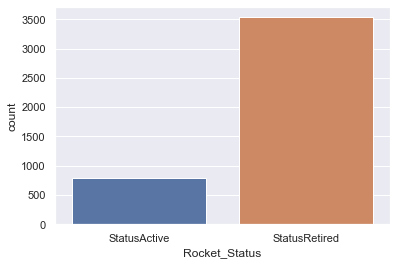

In [61]:
sns.set_theme(style="darkgrid")
sns.countplot(x=df_data.Rocket_Status)

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [63]:
df_data.Mission_Status.unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [67]:
#We need to connvert all the non Success status to Failure
df_data_Succes = df_data.copy()
df_data_Succes['Mission_Status'] = df_data_Succes['Mission_Status'].apply(lambda x : x if x == "Success" else "Failure")

<AxesSubplot:xlabel='Mission_Status', ylabel='count'>

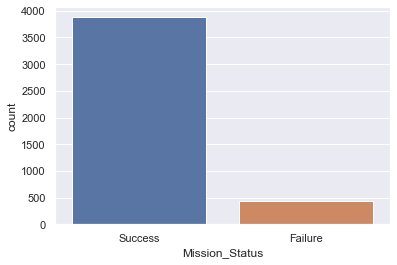

In [69]:
sns.countplot(x=df_data_Succes.Mission_Status)

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [181]:
df = pd.read_csv('mission_launches.csv')

In [182]:
df = df.dropna()

In [183]:
df["Price"] = df["Price"].apply(lambda x: int(x.split(".")[0].replace(",","")))

In [184]:
df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63,Success


In [117]:
df = df.groupby(by= ['Organisation']).sum()
df = df.sort_values(by=["Price"],ascending = False)

In [119]:
h_bar = px.bar(y=df.index[:20][::-1],
               x=df.Price[:20][::-1],
               orientation='h',
               color=df.Price[:20][::-1],
               color_continuous_scale='Viridis',
               title='Price of Launch in Millions per Organizations - Top 20')
 
h_bar.update_layout(xaxis_title='Millions of $', 
                    yaxis_title='Organization',
                    coloraxis_showscale=False)
h_bar.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [125]:
df_data["Location_State"] = df_data.Location.apply(lambda x: x.split(",")[-1])

In [126]:
dic_states = {
    "Russia": "Russian Federation",
    "New Mexico":"USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility":"USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria":"USA"
}

In [135]:
for key in dic_states:
    df_data["Location_State"] = df_data.Location_State.apply(lambda x: dic_states[x] if x == key else x )

In [142]:
df_data["ISO"] = cc.pandas_convert(series=df_data["Location_State"], to='ISO3')

 USA not found in regex
 Shahrud Missile Test Site not found in regex
 New Mexico not found in regex
 Yellow Sea not found in regex
 Pacific Missile Range Facility not found in regex
 Pacific Ocean not found in regex
 Barents Sea not found in regex
 Gran Canaria not found in regex


In [143]:
df_data["ISO"] = df_data.Location_State.apply(lambda x: "USA" if x.strip() == "USA" or x.strip() == "Pacific Missile Range Facility" or x.strip() == "Gran Canaria" or x.strip() == "Pacific Ocean" else x )
df_data["ISO"] = df_data.Location_State.apply(lambda x: "IRN" if x.strip() == "Shahrud Missile Test Site" else x )
df_data["ISO"] = df_data.Location_State.apply(lambda x: "USA" if x.strip() == "New Mexico" else x )
df_data["ISO"] = df_data.Location_State.apply(lambda x: "CHN" if x.strip() == "Yellow Sea" else x )
df_data["ISO"] = df_data.Location_State.apply(lambda x: "RUS" if x.strip() == "Barents Sea" else x )

In [146]:
df_data.ISO = df_data.ISO.apply(lambda x: "CHN" if x.strip() == "China" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "KAZ" if x.strip() == "Kazakhstan" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "JPN" if x.strip() == "Japan" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "ISR" if x.strip() == "Israel" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "NZL" if x.strip() == "New Zealand" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "RUS" if x.strip() == "Russia" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "IRN" if x.strip() == "Shahrud Missile Test Site" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "USA" if x.strip() == "Pacific Missile Range Facility" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "FRA" if x.strip() == "France" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "USA" if x.strip() == "Pacific Ocean" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "KOR" if x.strip() == "South Korea" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "BRA" if x.strip() == "Brazil" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "USA" if x.strip() == "Gran Canaria" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "KEN" if x.strip() == "Kenya" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "IRN" if x.strip() == "Iran" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "IND" if x.strip() == "India" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "USA" if x.strip() == "New Mexico" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "CHN" if x.strip() == "Yellow Sea" else x.strip())
df_data.ISO = df_data.ISO.apply(lambda x: "PRK" if x.strip() == "North Korea" else x.strip())


df_data.ISO.unique()


array(['USA', 'CHN', 'KAZ', 'JPN', 'ISR', 'NZL', 'RUS', 'IRN', 'FRA',
       'IND', 'PRK', 'KOR', 'BRA', 'KEN', 'AUS'], dtype=object)

In [151]:
df_data_ISO = df_data.groupby(by=['ISO']).count()


In [159]:
df_data_ISO.head()
df_data_ISO["Launches"] = df_data_ISO.Organisation

In [160]:
import plotly.express as px

df = df_data_ISO
fig = px.choropleth(df, locations=df.index,
                    color="Launches", # lifeExp is a column of gapminder
                    hover_name="Location", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [163]:
df_data_Fail = df_data[df_data.Mission_Status != "Success"]


In [167]:
df_data_Fail_ISO = df_data_Fail.groupby(by=['ISO']).count()
df_data_Fail_ISO["Failed Launches"] = df_data_Fail_ISO["Organisation"]
df = df_data_Fail_ISO
fig = px.choropleth(df, locations=df.index,
                    color="Failed Launches", # lifeExp is a column of gapminder
                    hover_name="Location", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [170]:
import plotly.express as px
df = df_data
fig = px.sunburst(df, path=['ISO', 'Organisation','Mission_Status'])
fig.show()

# Analyse the Total Amount of Money Spent by Organisation per launch

In [193]:
df = pd.read_csv('mission_launches.csv')
df = df.dropna()
df["Price"] = df["Price"].apply(lambda x: int(x.split(".")[0].replace(",","")))
df_data_ORG = df.groupby(by=["Organisation"]).sum()
df_data_ORG1 = df.groupby(by=["Organisation"]).count()

In [195]:
df_data_ORG["Amount of launch"] = df_data_ORG1['Location']

In [197]:
df_data_ORG['Price per launch'] = df_data_ORG.Price/df_data_ORG['Amount of launch']

In [208]:
df_data_ORG = df_data_ORG.sort_values(by=['Price per launch'],ascending = False)
df_data_ORG

,Unnamed: 0.1,Unnamed: 0,Price,Amount of launch,Price per launch
Organisation,,,,,
RVSN USSR,3916,3916,10000,2,"5,000.00"
NASA,249811,249811,76280,149,511.95
Boeing,6868,6868,1241,7,177.29
Arianespace,53444,53444,16344,96,170.25
ULA,52693,52693,14798,98,151.00
ILS,9584,9584,1320,13,101.54
MHI,19544,19544,3528,37,95.35
Martin Marietta,15881,15881,719,9,79.89
US Air Force,97290,97290,1550,26,59.62


In [210]:
h_bar = px.bar(y=df_data_ORG.index[0:10][::-1],
               x=df_data_ORG["Price per launch"][0:10][::-1],
               orientation='h',
               color=df_data_ORG["Price per launch"][0:0][::-1],
               color_continuous_scale='Viridis',
               title='Price per Launch in Millions per Organizations - Top 20')
 
h_bar.update_layout(xaxis_title='Millions of $', 
                    yaxis_title='Organization',
                    coloraxis_showscale=False)
h_bar.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [223]:
df.Date
df["Month"] = df.Date.apply(lambda x: x.split(" ")[1])
df_month = df.groupby(by = ['Month']).count()
df_month = df_month.sort_values(by = ['Price'],ascending = False)

In [225]:
h_bar = px.bar(y=df_month.index[::-1],
               x=df_month["Price"][::-1],
               orientation='h',
               color=df_month["Price"][::-1],
               color_continuous_scale='Viridis',
               title='Launches per Month')
 
h_bar.update_layout(xaxis_title='Launches', 
                    yaxis_title='Month',
                    coloraxis_showscale=False)
h_bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [260]:
df = pd.read_csv('mission_launches.csv')
df = df.dropna()
df["Price"] = df["Price"].apply(lambda x: int(x.split(".")[0].replace(",","")))
df["Date"][0].split(',')[1].split(" ")[1]

'2020'

In [261]:
df['Year'] = df["Date"].apply(lambda x: int(x.split(',')[1].split(" ")[1]))

In [262]:
df_year = df.groupby(by = ['Year']).sum()
df_year1 = df.groupby(by = ['Year']).count()
df_year['Price per launch'] = df_year.Price / df_year1.Price 



Text(0, 0.5, 'Price per launch in Million')

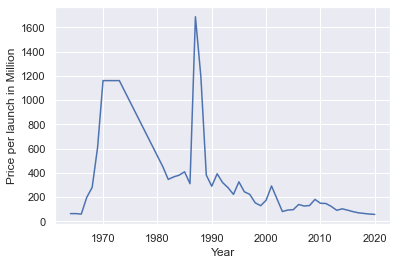

In [267]:
plt.plot(df_year.index,df_year['Price per launch'])
plt.xlabel("Year")
plt.ylabel("Price per launch in Million")

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [277]:
df = pd.read_csv('mission_launches.csv')
top_10_org = df.groupby(by = ['Organisation']).count().sort_values(by=['Location'],ascending = False).index[0:10]
top_10_org[1]

'Arianespace'

In [278]:
df['Year'] = df["Date"].apply(lambda x: int(x.split(',')[1].split(" ")[1]))

Text(0, 0.5, 'Launches per year')

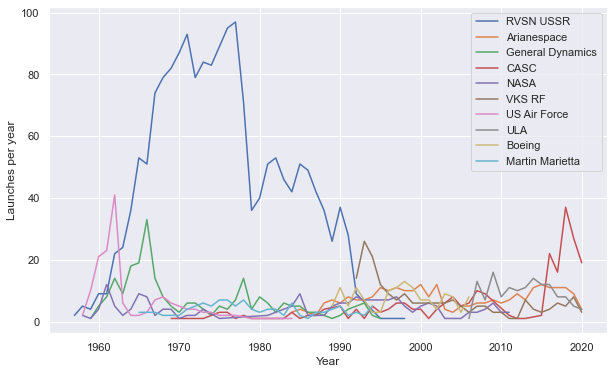

In [294]:
df_1 = df[df.Organisation == "SpaceX"]
df_1.sort_values(by = ['Year'])
plt.figure(figsize=(10,6))
for org in top_10_org:
    df_current = df[df.Organisation == org]
    df_current = df_current.sort_values(by = ['Year'])
    df_current = df_current.groupby(by = ['Year']).count()
    plt.plot(df_current.index,df_current.Location)
plt.legend(top_10_org)
plt.xlabel("Year")
plt.ylabel("Launches per year")

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [312]:
df_cold = df[df.Year <1992]
df_cold["Location_State"] = df_data.Location.apply(lambda x: x.split(",")[-1])

C:\Users\848105\AppData\Local\Temp\3\ipykernel_1592\4189101666.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [313]:
df_cold["ISO"] = cc.pandas_convert(series=df_cold["Location_State"], to='ISO3')

 USA not found in regex
C:\Users\848105\AppData\Local\Temp\3\ipykernel_1592\3752694263.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [316]:

dic_states = {
    "Russia": "Russian Federation",
    "New Mexico":"USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility":"USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria":"USA"
}
for key in dic_states:
    df_cold["Location_State"] = df_cold.Location_State.apply(lambda x: dic_states[x] if x == key else x )
df_cold["ISO"] = cc.pandas_convert(series=df_data["Location_State"], to='ISO3')
df_cold["ISO"] = df_data.Location_State.apply(lambda x: "USA" if x.strip() == "USA" or x.strip() == "Pacific Missile Range Facility" or x.strip() == "Gran Canaria" or x.strip() == "Pacific Ocean" else x )
df_cold["ISO"] = df_data.Location_State.apply(lambda x: "IRN" if x.strip() == "Shahrud Missile Test Site" else x )
df_cold["ISO"] = df_data.Location_State.apply(lambda x: "USA" if x.strip() == "New Mexico" else x )
df_cold["ISO"] = df_data.Location_State.apply(lambda x: "CHN" if x.strip() == "Yellow Sea" else x )
df_cold["ISO"] = df_data.Location_State.apply(lambda x: "RUS" if x.strip() == "Barents Sea" else x )









df_cold.ISO = df_cold.ISO.apply(lambda x: "CHN" if x.strip() == "China" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "KAZ" if x.strip() == "Kazakhstan" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "JPN" if x.strip() == "Japan" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "ISR" if x.strip() == "Israel" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "NZL" if x.strip() == "New Zealand" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "RUS" if x.strip() == "Russia" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "IRN" if x.strip() == "Shahrud Missile Test Site" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "USA" if x.strip() == "Pacific Missile Range Facility" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "FRA" if x.strip() == "France" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "USA" if x.strip() == "Pacific Ocean" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "KOR" if x.strip() == "South Korea" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "BRA" if x.strip() == "Brazil" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "USA" if x.strip() == "Gran Canaria" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "KEN" if x.strip() == "Kenya" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "IRN" if x.strip() == "Iran" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "IND" if x.strip() == "India" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "USA" if x.strip() == "New Mexico" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "CHN" if x.strip() == "Yellow Sea" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "PRK" if x.strip() == "North Korea" else x.strip())
df_cold.ISO = df_cold.ISO.apply(lambda x: "RUS" if x.strip() == "KAZ" else x.strip())

df_cold.ISO.unique()


C:\Users\848105\AppData\Local\Temp\3\ipykernel_1592\3018792005.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

 USA not found in regex
 Shahrud Missile Test Site not found in regex
 New Mexico not found in regex
 Yellow Sea not found in regex
 Pacific Missile Range Facility not found in regex
 Pacific Ocean not found in regex
 Barents Sea not found in regex
 Gran Canaria not found in regex
C:\Users\848105\AppData\Local\Temp\3\ipykernel_1592\3018792005.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\848105\AppData\Local\Temp\3\ipykernel_1592\3018792005.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\848105\AppData\Local\Temp\3\ipykernel_1592\3018792005.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\848105\AppData\Local\Temp\3\ipykernel_1592\3018792005.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

array(['CHN', 'RUS', 'FRA', 'USA', 'JPN', 'ISR', 'IND', 'KEN',
       'Australia'], dtype=object)

In [325]:
df_cold_war = df_cold.loc[(df_cold['ISO'].isin(["USA","RUS"]))]

In [327]:
df_cold_war.shape

(2432, 12)

In [330]:
df_could_launches = df_cold_war.groupby(by = ['ISO']).count()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

([<matplotlib.patches.Wedge at 0x2975bf672b0>,
 [Text(-0.7217126585979522, 0.8301390476417042, 'RUS'),
  Text(0.7217127363211763, -0.8301389800700848, 'USA')])

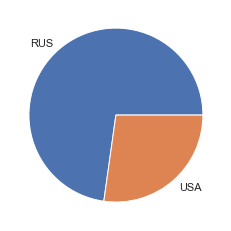

In [331]:
import matplotlib.pyplot as plt
labels = df_could_launches.index
sizes = df_could_launches.Year

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

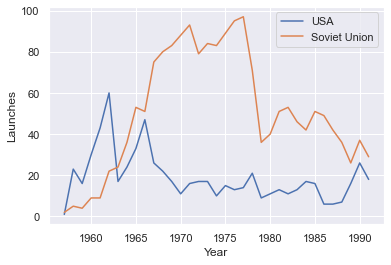

In [337]:
df_cold_war_USA = df_cold_war[df_cold_war.ISO == "USA"]
df_cold_war_RUS = df_cold_war[df_cold_war.ISO == "RUS"]
df_USA_count = df_cold_war_USA.groupby(by = ['Year']).count()
df_RUS_count = df_cold_war_RUS.groupby(by = ['Year']).count()
plt.plot(df_USA_count.index,df_USA_count.Detail )
plt.plot(df_RUS_count.index,df_RUS_count.Detail )
plt.xlabel("Year")
plt.ylabel("Launches")
plt.legend(["USA","Soviet Union"])

## Chart the Total Number of Mission Failures Year on Year.

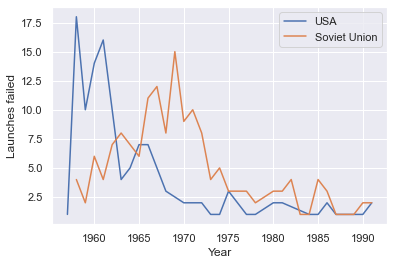

In [341]:
df_cold_war_USA_Fail = df_cold_war_USA[df_cold_war_USA['Mission_Status'] != 'Success']
df_cold_war_RUS_Fail = df_cold_war_RUS[df_cold_war_RUS['Mission_Status'] != 'Success']
df_cold_war_USA_Fail_Count = df_cold_war_USA_Fail.groupby(by = ['Year']).count()
df_cold_war_RUS_Fail_Count = df_cold_war_RUS_Fail.groupby(by = ['Year']).count()
plt.plot(df_cold_war_USA_Fail_Count.index,df_cold_war_USA_Fail_Count.Detail )
plt.plot(df_cold_war_RUS_Fail_Count.index,df_cold_war_RUS_Fail_Count.Detail )
plt.xlabel("Year")
plt.ylabel("Launches failed")
plt.legend(["USA","Soviet Union"])

In [345]:
df_cold_war_USA_Success = df_cold_war_USA[df_cold_war_USA['Mission_Status'] == 'Success']
df_cold_war_RUS_Success = df_cold_war_RUS[df_cold_war_RUS['Mission_Status'] == 'Success']

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [346]:
df_cold_war_USA_Success_Count = df_cold_war_USA_Success.groupby(by = ['Year']).count()
df_cold_war_RUS_Success_Count = df_cold_war_RUS_Success.groupby(by = ['Year']).count()

In [348]:
df_cold_war_USA_Success_Count['Failed'] = df_cold_war_USA_Fail_Count["Detail"]

In [349]:
df_cold_war_RUS_Success_Count['Failed'] = df_cold_war_RUS_Fail_Count["Detail"]

In [351]:
df_cold_war_USA_Success_Count['Perc'] = df_cold_war_USA_Success_Count['Failed']/ (df_cold_war_USA_Success_Count['Failed'] +df_cold_war_USA_Success_Count['ISO'])*100 

In [353]:
df_cold_war_RUS_Success_Count['Perc'] = df_cold_war_RUS_Success_Count['Failed']/ (df_cold_war_RUS_Success_Count['Failed'] +df_cold_war_RUS_Success_Count['ISO'])*100 

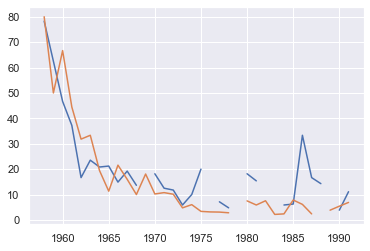

In [355]:
df_cold_war_RUS_Success_Count
plt.plot(df_cold_war_USA_Success_Count.index,df_cold_war_USA_Success_Count.Perc)
plt.plot(df_cold_war_RUS_Success_Count.index,df_cold_war_RUS_Success_Count.Perc)

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [358]:
df_data_per_land = df_data.groupby(by = ['Location_State']).count()

In [365]:
df_data_per_land = df_data_per_land.sort_values(by = ['ISO'],ascending = False)

([<matplotlib.patches.Wedge at 0x2975e42ae20>,
 [Text(0.5649570158520157, 0.9438345036284621, ' Russia'),
  Text(-1.0960260458414552, 0.09341791496894257, ' USA'),
  Text(-0.15764400024386307, -1.088645198945512, ' Kazakhstan'),
  Text(0.6197640740904808, -0.9087862743609023, ' France'),
  Text(0.9377235473731436, -0.5750430842136335, ' China'),
  Text(1.0633731152095218, -0.28149177225914995, ' Japan'),
  Text(1.0934207140373948, -0.1201296887282827, ' India'),
  Text(1.0996103565873283, -0.029275650050659185, ' Pacific Ocean')])

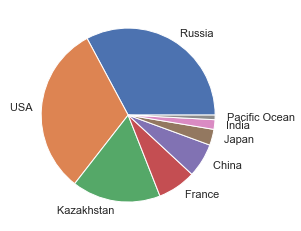

In [367]:
labels = df_data_per_land.index[:8]
sizes = df_data_per_land.ISO[:8]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [375]:
df_new = df.groupby(by=['Year','Organisation']).count()

In [377]:
df_new = df_new.sort_values(by = ['Year','Date'])

In [385]:
df_new.index[0]
x = []
y = []

for index in df_new.index:
    if not(index[0] in x):
        x.append(index[0])
        y.append(index[1])


[1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [387]:
y

['US Navy',
 'NASA',
 'General Dynamics',
 'NASA',
 'General Dynamics',
 'NASA',
 'NASA',
 'US Air Force',
 "Arm??e de l'Air",
 "Arm??e de l'Air",
 'AMBA',
 'CECLES',
 'CASC',
 'ASI',
 'CASC',
 'ASI',
 'CASC',
 'ISAS',
 'ASI',
 'ISAS',
 'CASC',
 'MHI',
 'CASC',
 'ESA',
 'CASC',
 'CASC',
 'CASC',
 'ESA',
 'CASC',
 'Martin Marietta',
 'ISAS',
 'ASI',
 'Douglas',
 'IAI',
 'CASC',
 'MHI',
 'CASC',
 'General Dynamics',
 'EER',
 'ESA',
 'AEB',
 'ESA',
 'AEB',
 'Eurockot',
 'CASC',
 'CASIC',
 'AEB',
 'IAI',
 'Eurockot',
 'Eurockot',
 'IAI',
 'ISA',
 'ISA',
 'Eurockot',
 'ISA',
 'CASC',
 'CASC',
 'CASIC',
 'Kosmotras',
 'Eurockot',
 'Blue Origin',
 'Eurockot',
 'ILS',
 'IAI']